LeNet5 was the first CNN architecture give by Yuan Lecen in 1998 for US Navy Postal Code and he is know as Father of CNN.

To inplement this dataset we'll be using the keras and tensorflow libraries. In keras, we will be using keras.layers.Conv2D to initialize the convolution layer
keras.layers.AveragePooling2D for Average Pooling and Flatten for flattenting the and sending the resultant Output to the ANN/ Fully connected Layer.
And we will be using this on mnist dataset which we'll import from keras.datasets.mnist

In [12]:
# Importing the Dependencies

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, Flatten, AveragePooling2D
from keras.datasets import mnist

In [13]:
## Getting the data

(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

# LeNet5 Architecture

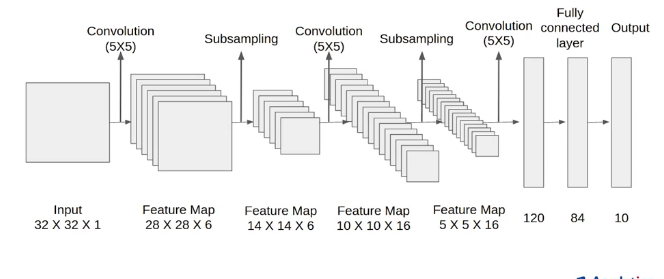

In [15]:
## Building the Model

## Input Image is GreyScale 28X28 images, so input_shape = (28,28,1)
## Back in 1998, best activation available function was 'tanh'
## So we'll work according to that only
## Padding and Strides were not done in conv layer
## In first conviltional Layer, 6 filters were used with size 5X5, defined by kernel_size = (5,5)
## Padding has 2 values , 'valid' > No Padding , 'same' > Padding is ON
## Stides has default value as 1, since it not giving in conv later so we go with default value
## Pooling Layer uses is AveragePooling2D, which takes 3 arguments
## pool_size =(2,2)
## stride = (2,2)
## padding = 'valid' > Indicates no padding in pooling layer also


model = Sequential()

# Layer 1 = Convoltuion Layer + Average Pooling Later

model.add(Conv2D(6, kernel_size=(5,5), padding = 'valid', activation = 'tanh', input_shape = (28,28,1))) # Conv layer
model.add(AveragePooling2D(pool_size =(2,2), strides = (2,2) , padding = 'valid' ))

# Layer 2 = Convoltuion Layer + Average Pooling Later

# Here 2nd COnvolution layer is similar to the 1st conv layer with the difference of number of filters used were 16 instead of 6.
# 2nd Pooling layer is similar to the first one with pool_size 2 and strides as 2.

model.add(Conv2D(16, kernel_size=(5,5), padding = 'valid', activation = 'tanh')) # Conv layer
model.add(AveragePooling2D(pool_size =(2,2), strides = (2,2) , padding = 'valid' ))

## Flattening

model.add(Flatten())

# Layer 3 = Hidden layer with 120 Nerons

model.add(Dense(120, activation = 'tanh'))

# Layer 4 = Hidden Layer with 84 Nerons

model.add(Dense(84, activation = 'tanh'))

# Layer 5 = Output Layer

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_8 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_9 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

Since No training happens in pooling, it doesn't have any traininable parameter

In [18]:
## Train the Model

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )
model.fit(x_train, y_train, epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0471 - val_accuracy: 0.9861
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0421 - val_accuracy: 0.9880
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0424 - val_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0200 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9880


In [ ]:
## Model is givng very good result with Validation accracy more than 98%